In [1]:
from collections import Counter
import json
import os

from pymatgen.ext.matproj import MPRester

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
with open("topo_data.json", "r") as file:
    data = json.load(file)

In [3]:
with open(os.path.expanduser("~/.mpapikey"), "r") as f:
    apikey = f.read().strip()

In [4]:
coord_stats = {}

for mat in list(data.values()):
    for atom, coord in mat['coordination']:
        if atom not in coord_stats:
            coord_stats[atom] = Counter()
        coord_stats[atom][int(coord)] += 1

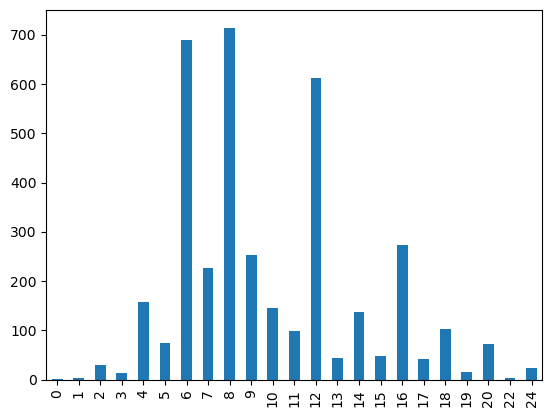

In [5]:
_ = pd.DataFrame.from_dict(coord_stats['Ce'], orient='index').sort_index().plot(kind='bar', legend=False)

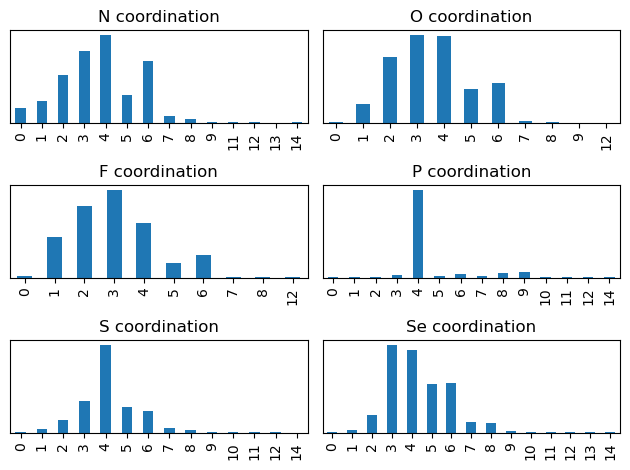

In [6]:
atomtypes = ["N", "O", "F", "P", "S", "Se"] #, "Ti", "Zn", "Ag"]

fig = plt.figure()
for i, var_name in enumerate(atomtypes):
    ax = fig.add_subplot(3, 2, i+1)
    d = pd.DataFrame.from_dict(coord_stats[var_name], orient='index').sort_index()
    d.plot(kind='bar', legend=False, ax=ax, yticks=[])
    ax.set_title(var_name + " coordination")
fig.tight_layout()
plt.show()
fig.savefig("histo_coord.pdf")

In [7]:
list(data.values())[50422]

{'material_id': 'mp-1245868',
 'formula_pretty': 'VCN2',
 'nelements': 3,
 'theoretical': True,
 'is_stable': None,
 'crystal_system': 'Hexagonal',
 'space_group': 194,
 'coordination': [['V', 6], ['C', 2], ['N', 4]],
 'bonds': [['C', 'N'], ['V', 'N']],
 'topology': [[1, 3, 'xat']]}

In [8]:
def has_bond(material, label1, label2):
    for bond in material['bonds']:
        if (bond[0] == label1 and bond[1] == label2) or (bond[0] == label2 and bond[1] == label1):
            return True
    return False

In [9]:
# Materials with Ag-S or Au-S bonds
print("Au-S bonds: ", len([k for k, v in data.items() if has_bond(v, "Au", "S")]))
print("Ag-S bonds: ", len([k for k, v in data.items() if has_bond(v, "Ag", "S")]))

Au-S bonds:  81
Ag-S bonds:  684


In [10]:
cu_f = [k for k, v in data.items() if has_bond(v, "Cu", "F")]
c = Counter([x[1] for i in cu_f for x in data[i]['coordination'] if x[0] == "Cu"])
c.most_common()

[(6, 445), (4, 101), (5, 71), (2, 14), (3, 4), (7, 2), (12, 1), (1, 1)]